In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [4]:
X=pd.get_dummies(X, drop_first=True) 
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,False,True,False,False,False,False,False,True,False


In [5]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X)

X_scaled= scaler.transform(X)
print("Normalized input data(X):\n", X_scaled)


Normalized input data(X):
 [[-1.4331398   0.41090889  0.82507026 ... -0.8235563  -1.00218103
   1.15067399]
 [-0.47848359  1.49175234 -0.17196105 ... -0.8235563   0.99782372
  -0.86905588]
 [-1.75135854 -0.12951283  0.7701878  ... -0.8235563  -1.00218103
   1.15067399]
 ...
 [ 0.37009972 -0.12951283 -0.62016778 ...  1.21424608  0.99782372
  -0.86905588]
 [ 0.37009972 -0.12951283  0.34027522 ... -0.8235563   0.99782372
  -0.86905588]
 [-1.64528563  0.30282455 -0.21769643 ... -0.8235563  -1.00218103
   1.15067399]]


In [6]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score ,accuracy_score
def show_confusion(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix for XGBoostClassifier:')
    print(conf_matrix)

    print("__"*50 )

    print("num of True Positive :",conf_matrix[1][1])
    print("num of True Negative :",conf_matrix[0][0])
    print("num of False Positive :",conf_matrix[0][1])
    print("num of False Negative :",conf_matrix[1][0])
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', cbar=False)
    plt.title('Confusion Matrix for XGBoostClassifier')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    classification_rep = classification_report(y_test, y_pred)
    print('\nClassification Report for XGBoostClassifier:')
    print(classification_rep)
    
    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    print(f'Precision of XGBoostClassifier : {precision*100:.2f} %')

    recall = recall_score(y_test, y_pred)
    print(f'Recall of XGBoostClassifier    : {recall*100:.2f} %')

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of XGBoostClassifier  : {accuracy*100:.2f} %')

Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
[0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1

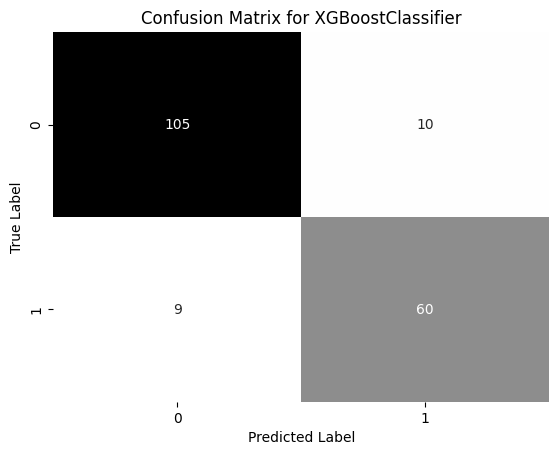


Classification Report for XGBoostClassifier:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       115
           1       0.86      0.87      0.86        69

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184

Precision of XGBoostClassifier : 85.71 %
Recall of XGBoostClassifier    : 86.96 %
Accuracy of XGBoostClassifier  : 89.67 %
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None

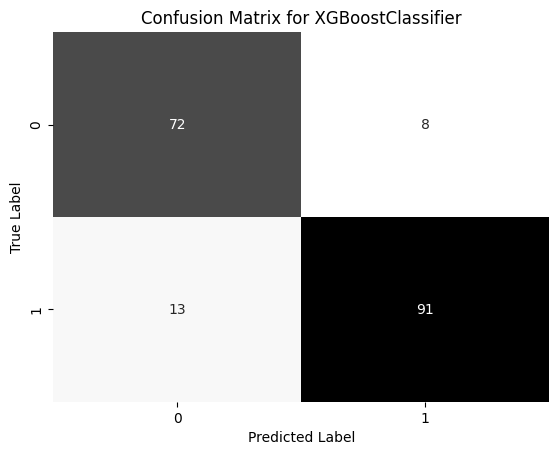


Classification Report for XGBoostClassifier:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        80
           1       0.92      0.88      0.90       104

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

Precision of XGBoostClassifier : 91.92 %
Recall of XGBoostClassifier    : 87.50 %
Accuracy of XGBoostClassifier  : 88.59 %
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None

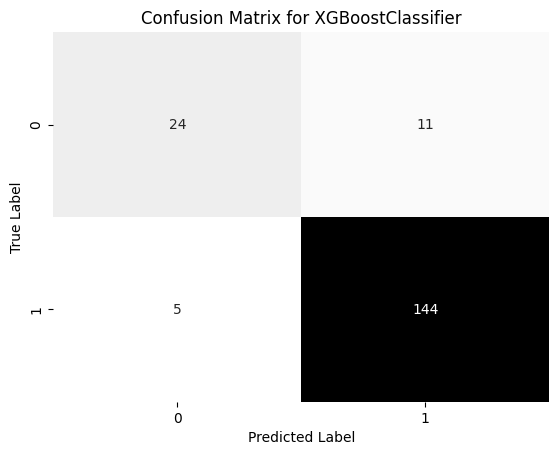


Classification Report for XGBoostClassifier:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.93      0.97      0.95       149

    accuracy                           0.91       184
   macro avg       0.88      0.83      0.85       184
weighted avg       0.91      0.91      0.91       184

Precision of XGBoostClassifier : 92.90 %
Recall of XGBoostClassifier    : 96.64 %
Accuracy of XGBoostClassifier  : 91.30 %


In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


kf = KFold(n_splits=5)
for i, (train_split_idx, test_split_idx) in enumerate(kf.split(X_scaled, y)):
    X_train, y_train = X_scaled[train_split_idx], y[train_split_idx]
    X_test, y_test = X_scaled[test_split_idx], y[test_split_idx]
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train, y_train)
    X_train = np.hstack([X_train, clf.transform(X_train)])
    X_test = np.hstack([X_test, clf.transform(X_test)])
    
    xgb = XGBClassifier()

    # Define the hyperparameter grid for grid search
    param_grid = {
        'n_estimators': [100, 200, 300, 800,850],    
        'learning_rate': [0.01, 0.001, 0.1, 0.2],   
        'max_depth': [3, 4, 5,6],              
    }


    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=10, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Best hyperparameters: ", grid_search.best_params_)
    best_model = grid_search.best_estimator_
    print(best_model)
    y_pred=best_model.predict(X_test)
    print(y_pred)
    result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten() })
    print(result_df)
    show_confusion(y_test, y_pred)